In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

Fungsi ini digunakan untuk import library yang diperlukan untuk menjalankan program

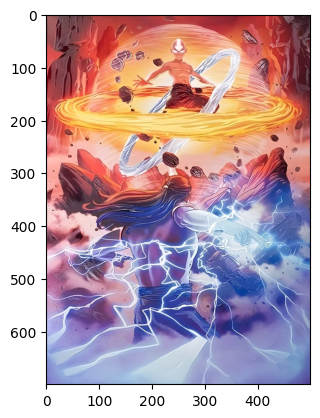

In [5]:
image = img.imread("aang.jpg")
plt.imshow(image)

Fungsi ini digunakan untuk menampilkan output citra yang akan digunakan pada layar. Script "imread" digunakan untuk membaca citra yang di input dan script "imshow" digunakan untuk menampilkan output citra.

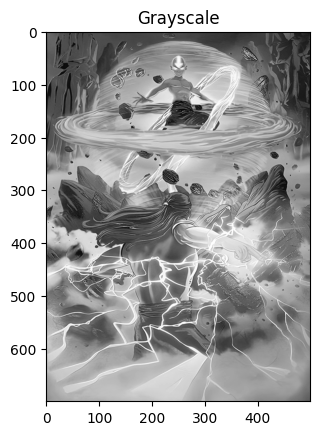

In [6]:
imageGr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(imageGr, cmap='gray')
plt.title('Grayscale')
plt.show()

Fungsi ini digunakan untuk mengubah warna citra menjadi grayscale dengan menggunakan function "cvtcolor" dan "COLOR_BGR2GRAY" dari library opencv lalu menampilkannya menggunakan function "show" dari library matplotlib.pyplot

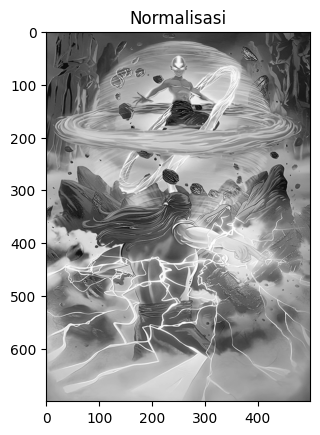

In [7]:
imageNr = (imageGr - np.min(imageGr)) / (np.max(imageGr) - np.min(imageGr))

plt.imshow(imageNr, cmap='gray')
plt.title('Normalisasi')
plt.show()

Fungsi ini berguna untuk melakukan normalisasi dari citra grayscale yang sudah di proses dengan menggunakan function dari library numpy lalu menampilkannya menggunakan function "show" dari library matplotlib.pyplot

[   0    0    0   11   22   29   59   76   59   73   68   73   92   77
  110  103  159  127  130  162  171  163  157  147  146  150  143  168
  191  249  348  362  401  412  360  375  389  400  396  406  484  430
  482  473  538  502  589  584  614  592  620  635  636  662  680  819
  772  900  916  943 1066 1100 1142 1183 1273 1282 1207 1189 1140 1242
 1491 1756 1787 1930 1881 1894 2034 2083 2180 2174 2128 2059 1966 1942
 1893 1810 1774 1773 1848 1891 1830 1764 1744 1743 1749 1717 1833 1938
 1744 1732 1788 1829 1869 1859 1664 1715 1787 1727 1754 1767 1881 1813
 1900 1811 1843 1811 1810 1784 1757 1845 1758 1681 1712 1752 1724 1717
 1734 1723 1647 1630 1781 1646 1679 1757 1793 1724 1791 1876 1971 1948
 2109 2034 2081 2079 2157 2129 2182 2059 2143 2203 2221 2204 2269 2445
 2404 2359 2277 2557 2670 2690 2636 2607 2768 2709 2767 2953 2752 2708
 2622 2671 2592 2497 2534 2478 2643 2654 2540 2556 2467 2394 2529 2463
 2606 2672 2411 2481 2564 2436 2509 2483 2168 2146 2167 2026 1807 1705
 1653 

Text(0, 0.5, 'Normalized Frequency')

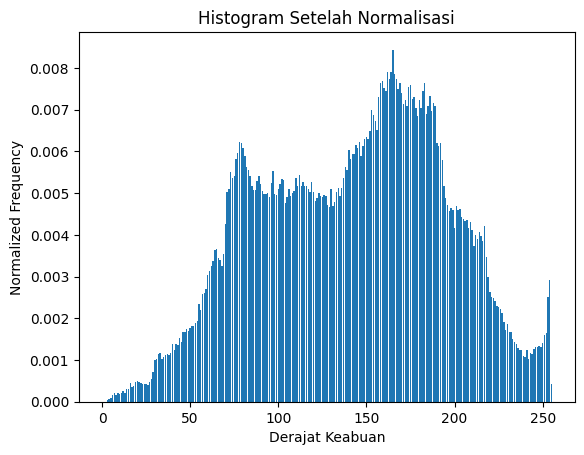

In [8]:
tinggi, lebar = imageNr.shape
arr = np.zeros(256).astype(int)
for i in range (tinggi):
    for j in range (lebar):
        arr[imageGr[i,j]]+=1
print(arr)

x = [x for x in range (256)]

plt.bar(x, arr/(tinggi*lebar))
plt.title("Histogram Setelah Normalisasi")
plt.xlabel('Derajat Keabuan')
plt.ylabel('Normalized Frequency')

Fungsi ini berguna untuk menampilkan histogram dari hasil citra normalisasi dengan bantuan function dari library numpy dan library matplotlib.pyplot

Fungsi ini berguna untuk menghitung intensitas setiap indeks gambar menggunakan looping for dan library numpy.

In [9]:
intensity_counts = np.zeros(256)
for intensity in imageNr.flatten():
    index = int(intensity * 255)
    intensity_counts[index] += 1

print("Jumlah intensitas setiap indeks gambar:")
print(intensity_counts)

Jumlah intensitas setiap indeks gambar:
[  11.   22.   29.   59.   76.   59.   73.   68.   73.   92.   77.  110.
  103.  159.  127.  130.  162.  171.  163.  157.  147.  146.  150.  143.
  168.  191.  249.  348.  362.  401.  412.  360.  375.  389.  400.  396.
  406.  484.  430.  482.  473.  538.  502.  589.  584.  614.  592.  620.
  635.  636.  662.  680.  819.  772.  900.  916.  943. 1066. 1100. 1142.
 1183. 1273. 1282. 1207. 1189. 1140. 1242. 1491. 1756. 1787. 1930. 1881.
 1894. 2034. 2083. 2180. 2174. 2128. 2059. 1966. 1942. 1893. 1810. 1774.
    0. 1773. 1848. 1891. 1830. 1764. 1744. 1743. 1749. 1717. 1833. 1938.
 1744. 1732. 1788. 1829. 1869. 1859. 1664. 1715. 1787. 1727. 1754. 1767.
 1881. 1813. 1900. 1811. 1843. 1811. 1810. 1784. 1757. 1845. 1758. 1681.
 1712. 1752. 1724. 1717. 1734. 1723. 1647. 1630. 1781. 1646. 1679. 1757.
 1793. 1724. 1791. 1876. 1971. 1948. 2109. 2034. 2081. 2079. 2157. 2129.
 2182. 2059. 2143. 2203. 2221. 2204. 2269. 2445. 2404. 2359. 2277. 2557.
 2670. 2690

Fungsi ini berguna untuk menjalankan proses konvolusi pada citra hasil normalisasi sebelumnya menggunakan kernel yang sudah disediakan yang di input melalui library numpy dan diproses menggunakan cv2 dari library opencv lalu ditampilkan menggunakan dengan function dari library matplotlib.pyplot

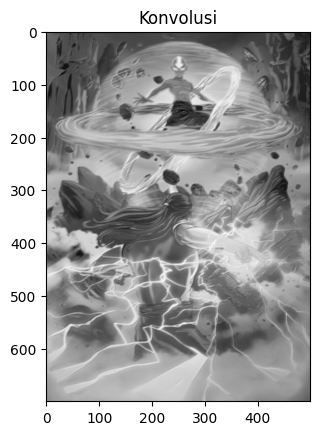

In [10]:
kernel = np.array([[1, 2, -1, 1],
                   [0, 2, 1, 2],
                   [2, 1, 1, 0],
                   [1, 0, -1, 0]])

imageKv = cv2.filter2D(imageNr, -1, kernel, borderType=cv2.BORDER_CONSTANT)

plt.imshow(imageKv, cmap='gray')
plt.title('Konvolusi')
plt.show()

Fungsi ini berguna untuk melakukan rotasi sebanyak 40 derajat dari citra grayscale sebelumnya menggunakan function yang tersedia pada libary opencv/cv2 dan ditampilkan dengan function library matplotlib.pyplot

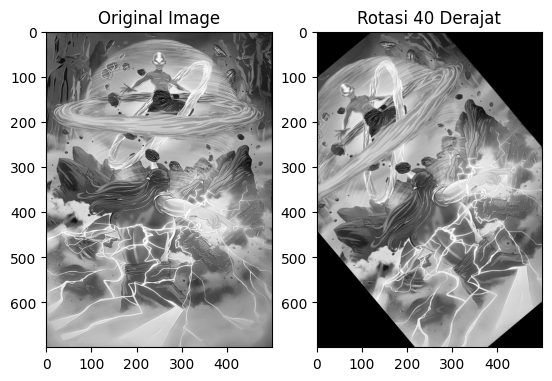

In [11]:
angle = 40
rotate = cv2.getRotationMatrix2D((imageGr.shape[1] / 2, imageGr.shape[0] / 2), angle, 1)
imageRotate = cv2.warpAffine(imageGr, rotate, (imageGr.shape[1], imageGr.shape[0]))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imageGr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imageRotate, cv2.COLOR_BGR2RGB))
plt.title('Rotasi 40 Derajat')
plt.show()

Fungsi ini berguna untuk melakukan translasi dengan X : 300 dan Y : -163 dari citra grayscale yang sudah di rotasi sebelumnya menggunakan function yang tersedia pada libary numpy, opencv/cv2 dan ditampilkan dengan function library matplotlib.pyplot

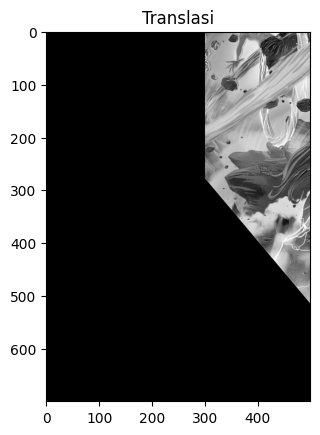

In [12]:
translation = np.float32([[1, 0, 300], [0, 1, -163]])
imageTr = cv2.warpAffine(imageRotate, translation, (image.shape[1], image.shape[0]))

plt.imshow(cv2.cvtColor(imageTr, cv2.COLOR_BGR2RGB))
plt.title('Translasi')
plt.show()

Fungsi ini berguna untuk melakukan pencerminan atau flipping dari citra grayscale yang sudah di rotasi dan translasi sebelumnya menggunakan function yang tersedia pada opencv/cv2 dan ditampilkan dengan function library matplotlib.pyplot

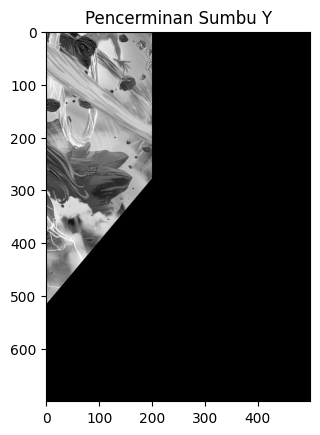

In [13]:
imageFlip = cv2.flip(imageTr, 1)

plt.imshow(cv2.cvtColor(imageFlip, cv2.COLOR_BGR2RGB))
plt.title('Pencerminan Sumbu Y')
plt.show()

Fungsi ini berguna untuk melakukan dilatasi dari citra grayscale yang sudah di rotasi, translasi, dan flipping sebelumnya menggunakan function yang tersedia pada numpy dan opencv/cv2 lalu ditampilkan dengan function library matplotlib.pyplot

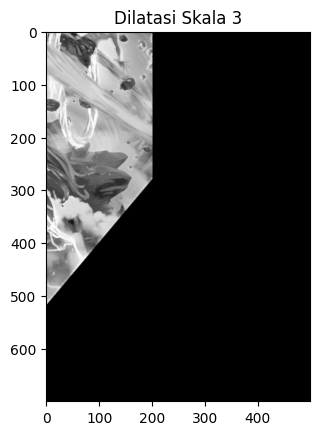

In [14]:
kernel = np.ones((3, 3), np.uint8)
imageDilate = cv2.dilate(imageFlip, kernel, iterations=1)

plt.imshow(cv2.cvtColor(imageDilate, cv2.COLOR_BGR2RGB))
plt.title('Dilatasi Skala 3')
plt.show()